# Rock vs Metal

This Jupyter Notebook is inspired in the following papers [Analysis of Hidden Units in a Layered Network
Trained to Classify Sonar Targets](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.84.6963&rep=rep1&type=pdf) and [Learned Classification of Sonar Targets Using a
Massively Parallel Network](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.164.2513&rep=rep1&type=pdf) by Paul Gorman and Terrence Sejnowski. In order to complete this project, I highly recommend that you read both papers to fully understand the problems that you will later solve.

## Part 1:
### Create a reflected FM chirp signal
A chirp is a signal in which the frequency increases (up-chirp) or decreases (down-chirp) with time. It is commonly applied to sonar, radar, and laser systems, and to other applications, such as in spread-spectrum communications.

In spread-spectrum usage, surface acoustic wave (SAW) devices are often used to generate and demodulate the chirped signals. In optics, ultrashort laser pulses also exhibit chirp, which, in optical transmission systems, interacts with the dispersion properties of the materials, increasing or decreasing total pulse dispersion as the signal propagates. The name is a reference to the chirping sound made by birds. 

In this part two task are described:
1. How to create a linear FM swept-frequency cosine chirp signal?
2. How to model the received sonar signal? 

#### 1. Mathematical description of the chirp signal
This signal is defined as follows:

$$x(t)=\cos{\left( \phi(t) + \rho \right)}$$

where $\phi(t)$ is the instantaneous phase of the signal given by

$$\phi(t)=\int_{0}^{t} 2\pi f(t) dt$$

and $f(t)$ as
$$f(t) = f_0 + \frac{(f_1-f_0)t}{t_1}$$

where $t_1$ is the chirp's duration, $f_0$ is the initial frequency, and $f_1$ is the frequency at time $t_1$.

#### 2. Mathematical model of the received chirp signal
We can model our received sonar chirp signal $\hat{x}(t)$ as modified version of the original signal $x(t)$ as follows:

suppose we have a transmitted signal

$$x(t)=\cos{\left( \phi(t) + \rho \right)}$$

Which has been affected by three main sources of distortion:
1. additive white noise $n(t)$,
2. propagation effect, modeled as an exponential decay,
3. random time delay $\tau$ at the receiving end

then we can formulate an equation as follows

$$\hat{x}(t)=e^{t}x(t-\tau)+n(t)$$

that describes the received signal.

### Create your python functions
In this part you will implement the following two functions:
1. `chirp` which is a function that returns a chirp signal like the one described in **Mathematical description of the chirp signal**
2. `noisy_chirp` which is a function that returns a signal like the one described in **Mathematical model of the received chirp signal**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp as scipy_chirp

First create your `chirp` function. For this task, you will also create a function `get_phase` which calculates the phase needed for the `chirp` signal.

In [ ]:
def get_phase(t, f0, f1, t1):
    """
    Auxiliary function that performs the calculation of the phase of a linear instantaneous frequency.
    :param t: (numpy vector) defines the time at which we evaluate the waveform
    :param f0: (float) frequency in Hz. at time t=0.
    :param f1: (float) frequency in Hz. of the waveform at time t1.
    :param t1: (float) time at which f1 is specified
    :return: phase calculation of the linear instantaneous frequency
    """
    return None


def chirp(t, f0, f1, t1, phi=0):
    """
    Function that calculates an FM chirp signal.
    :param t: (numpy vector) defines the time at which we evaluate the waveform
    :param f0: (float) frequency in Hz. at time t=0.
    :param f1: (float) frequency in Hz. of the waveform at time t1.
    :param t1: (float) time at which f1 is specified
    :param phi: (float, optional) Phase offset, in degrees. Default is 0.
    :return: (numpy array) chirp FM signal
    """
    
    return None

Now test your implementation against the SciPy implementation of the chirp signal. If your results match, then everything is working perfectly!

In [ ]:
f0 = 1
f1 = 6
t1 = 100*(1/f1)
t = np.linspace(0, t1, 1500)

signal_test = chirp(t, f0, f1, t1)
signal_reference = scipy_chirp(t, f0=f0, f1=f1, t1=t1, method='linear')

match = np.allclose(signal_test, signal_reference)

if match:
    print("Your test and reference signals are same. Gret work!")
else:
    print("Your test and reference signals differ.")

plt.subplot(2,1,1)
plt.plot(t, signal_test)
plt.title("Chirp Test Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.plot(t, signal_reference)
plt.title("Chirp Reference Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplots_adjust(hspace=0.8)

assert match, "Check your code! Your implementation has some errors!"

Now make your noisy chirp signal. For this task you will create the `noisy_chirp` function, remember that the function performs the following calculation:

$$\hat{x}(t)=e^{t}x(t-\tau)+n(t)$$

Bear in mind that $\tau$ introduces an offset to the signal, and at the end of the signal there's also a trailing data received. The following image can explain this idea:

![Received](Images/received_signal.png)

So in order to define your `noisy_chirp` you will have to create this two variables `tau` and `trail` which increases the size of the original transmitted signal. We will use random values between `50` and `60` for each variable, you can assign these variables using the numpy function `random.randint` for this purpose. Assume noise as a random process with mean zero and standard deviation of `0.2`.

In [ ]:
def noisy_chirp(x, t):
    """
    Function that calculates a noisy FM chirp signal. Assume 
    :param x: (numpy vector) input chirp signal
    :param t: (numpy vector) defines the time at which we evaluate the waveform
    :return: (numpy array) noisy chirp FM signal
    """
    np.random.seed(123) #Set this to have the same results.
    
    
    return None

Now test your noisy signal with the following code. If everything works well it should look very similar to this image:

![Noisy](Images/noisy_signal.png)


In [ ]:
f0 = 13000
f1 = 21000
t1 = 100*(1/f1)
t = np.linspace(0, t1, 120)

transmitted = chirp(t, f0, f1, t1)

received = noisy_chirp(transmitted, t)
plt.plot(received)
plt.title("Noisy Generated Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time");

## Part 2:
### Find the power spectral density
Right now our problem is that we want to estimate the power spectral density of a wide-sense stationary random process. The main problem of power spectrum estimation is that data $x[n]$ is always finite. There are two basic approaches to solve this problem:
1. Nonparametric such as *Periodogram*, *Bartlett* and *Welch* (most common)
2. Parametric approaches (less common)

For our implementation we will use Bartlett's method, if you want further information about other methods you can check this [link](http://www.laurent-duval.eu/Documents-Common/Schuster_G_2010_lect_spectrum_upbw.pdf).

Bartlett’s method consists of the following steps:

1. The original N point data segment is split up into K (non-overlapping) data segments, each of length M
2. For each segment, compute the periodogram by computing the discrete Fourier transform (DFT version which does not divide by M), then computing the squared magnitude of the result and dividing this by M.
3. Average the result of the periodograms above for the K data segments. (The averaging reduces the variance, compared to the original N point data segment.)

The end result is an array of power measurements vs. frequency "bin".

In [25]:
import sys
sys.path.insert(0, '../')

from scipy import signal
from Common import complex_fourier_transform

In [ ]:
def bartlett_periodogram(x, nperseg, fs=1.0):
    """
    Estimate power spectral density using Bartlett’s method.
    :param x: (numpy vector) input signal
    :param nperseg: (int) length of each segment of data
    :param fs: (float) sampling frequency of the x time series. Defaults to 1.0.
    :return: freq (numpy vector) normalized frequency values between 0 and 0.5 for psd calculation
             psd (numpy vector) power spectral density using Bartlett’s method
    """
    
    return freq, psd #Be cautious to always set psd[0]=0
    

def fix_size(x, N=64):
    """
    Auxiliary function to give a power of two dimension to input x
    (No need to change anything here.)
    :param x: (numpy vector) input signal
    :param N: (int) minimum size input x should have
    :return: (numpy vector) vector x with size(x)%N zeros appended
    """
    zeros = x.shape[0] % N
    if zeros>0:
        temp = np.zeros((zeros, 1))
    return np.append(x, temp)


Now it is time to test your `bartlett_periodogram` implementation, for this purpose you will compare it with the `signal.welch` from SciPy. The `signal.welch` implementation performs the Welch's method for estimating the spectral density of a signal, since Welch's method is an upgrade version of Bartlett's, we can get the same results for both methods by setting the overlap for Welch's method to zero. You can get more information about Welch's method [here](https://en.wikipedia.org/wiki/Welch%27s_method). Note that Welch returns the power spectral density, which is the power spectrum times $f_s$ and it compensates for cutting away half the spectrum by multiplying with $2$. To compensate, we multiply Bartlett's method by $2f_s$ in order to compare with Welch.
Check your results, and if the plots match, then everything works well!

In [ ]:
nperseg = 32
fs = 1

f_bartlett, psd_bartlett = bartlett_periodogram(fix_size(received), nperseg=nperseg)

f_welch, psd_welch = signal.welch(fix_size(received), fs=fs, nperseg=nperseg, 
                                nfft=nperseg, window='boxcar', noverlap=0)

f = f_bartlett

plt.plot(f, 2*fs*psd_bartlett, label="Custom Implementation")
plt.plot(f, psd_welch[:-1], label="SciPy") 
plt.title("Power Spectral Density")
plt.xlabel("Normalized Frequency")
plt.ylabel("$V^2Hz$")
plt.legend();

## Part 3:
### Create a simple classifier by using the correlation
In this final part you will implement a simple correlation classifier for the [**Connectionist Bench (Sonar, Mines vs. Rocks) Data Set**](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)). This dataset is the same used in the papers described at the beginning of this Jupyter Notebook. To simplify our task we are going to use Pandas, which is simple data analysis and manipulation tool for python.

In [2]:
import pandas as pd
from Common import correlation

corr = correlation.Correlation()

First we load our dataset which is called `dataset_sonar.csv` and it is stored in the `Dataset` folder. We also defined a function called `get_data` whose purpose is to simplify our data retrieval.

In [3]:
file = "Dataset/dataset_sonar.csv"
data = pd.read_csv(file)

def get_data(data, k):
    x = data.iloc[k][0:-1]
    y = data.iloc[k][-1]
    return x, y

Here you can see how our data looks and how different a signal from a Rock and Mine is received.

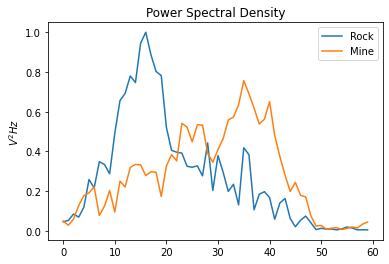

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x0, y0 = get_data(data, k=1)
x1, y1 = get_data(data, k=97)
t = np.arange(x0.shape[0])

plt.plot(t, x0, label=y0)
plt.plot(t, x1, label=y1)
plt.title("Power Spectral Density")
plt.ylabel("$V^2Hz$")
plt.legend();

### Implement an average signal model
In this part you will implement an `average_signal` function, whose purpose is to find a mean rock and mine signal. The main objective of this function is to sum all rock/mine signals and return an average of a rock/mine signal.

In [ ]:
def average_signal(data, k_range):
    """
    Function that calculates the average of a given data set.
    :param data: (pandas dataframe) data that has the rock/mines dataset
    :param k_range: (tuple) initial and final value to iterate our data
    :return: average signal calculation
    """

    return None

Here you can test your `average_signal` implementation, and see the results of each one.

In [ ]:
rock = average_signal(data, (0,97))
mine = average_signal(data, (97,208))

In [ ]:
plt.plot(t, rock, label="rock")
plt.plot(t, mine, label="mine")
plt.title("Mean Power Spectral Density")
plt.ylabel("$V^2Hz$")
plt.legend();

### Evaluate your model
Now test your model and see how accurate is. For this we evaluate the correlation between the average rock and mine signal against any signal, for example `k=152`, and we decide that the correlation which is bigger belongs to that class. So for example if correlation between our signal and mine is bigger than correlation between our signal and rock, then the signal must come from a mine.

In [ ]:
x_eval, y_eval = get_data(data, k=152)

rock_corr = corr.norm_correlation((np.array(x_eval.values)).reshape(-1,1),
                      (np.array(rock.values)/96).reshape(-1,1), algorithm='fast')

mine_corr = corr.norm_correlation((np.array(x_eval.values)).reshape(-1,1),
                      (np.array(mine.values)/101).reshape(-1,1), algorithm='fast')


if rock_corr.max()>mine_corr.max():
    print("Predicted material type = Rock")
else:
    print("Predicted material type = Mine")
    
print("Real material = {}".format(y_eval))

### Evaluate on every signal
As a final exercise you will have to evaluate on every signal on the dataset against our average rock/mine signals and evaluate how accurate this classifier is. We define accuracy as:
$$ ac = \frac{cls}{ts}*100$$

where $ac$ is the accuracy, $cls$ are the correct label signals, and $ts$ are total signals.

In [ ]:
# Implement your accuracy calculation

## Part 4:
As a final exercise, try to think how can you come with a better classifier. And write what you can come up with. (You don't have to implement any code.)